In [ ]:
# TFM - Grupo 2 - Entrega 18/05/2024

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format


In [2]:
df_event = pd.read_csv("data/daily_calendar_with_events.csv")
df_prices = pd.read_csv("data/item_prices.csv")
df_sales = pd.read_csv("data/item_sales.csv")

In [ ]:
# Indicador serve para quando rodar novamente todo o fonte, nao gerar impressoes de dados que nao sao mais modificados, ganhando em tempo
IndicadorProcessarNovamente = True

# Tratamento DF Event

In [ ]:
# daily_calendar_with_events.csv
df_event.info()

In [ ]:
df_event.head()

In [ ]:
colunas = df_event.columns

In [ ]:
df_event.describe(datetime_is_numeric=True)

In [ ]:
df_event['date'] = pd.to_datetime(df_event.date)
#df_event.set_index('date', inplace=True)

In [ ]:
df_event.dtypes

In [ ]:
df_event["weekyear"] = df_event['date'].dt.isocalendar().week

df_event["year"] = df_event['date'].dt.year

In [ ]:
def g(x):
    return  np.int16(str(x[0]) + str(x[1]))

df_event['yearweek'] = df_event[['year', 'weekyear']].apply(g, axis=1)

In [ ]:
colunas = ['weekday_int', 'weekyear']
df_event[colunas].astype("int8")

colunas = ['year', 'yearweek']
df_event[colunas].astype("int16")

In [ ]:
colunas = df_event.columns

In [ ]:
df_event.info()

In [ ]:
# Substituir linhas com valores NaN por 'Normalday'

df_event.fillna('Normalday', inplace=True)

In [ ]:
df_event['event'].value_counts()

# Tratamento DF Prices

In [ ]:
# item_prices.csv
df_prices.info()

In [ ]:
df_prices.head()

In [ ]:
df_prices.describe(datetime_is_numeric=True)

In [ ]:
df_prices.query("yearweek.isnull()").head()

In [ ]:
colunas = df_prices.columns

In [ ]:
# Adicionado zero para a semana do ano que esta null
df_prices["yearweek"].fillna(0, inplace=True)

In [ ]:
colunas = ['yearweek']
df_prices[colunas].astype("int16")

In [ ]:
colunas = df_prices.columns
colunas

In [ ]:
plt.figure(figsize=(12, 4), dpi=100)
sns.histplot(df_prices["sell_price"], bins = 80, color='y')

# Define os intervalos dos rótulos do eixo x
plt.xticks(range(0, int(df_prices["sell_price"].max()) + 1, 10))

plt.title("Histograma - sell_price")
plt.show()

# Tratamento DF Sales

In [3]:
#item_sales.csv

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1920 entries, id to d_1913
dtypes: int64(1913), object(7)
memory usage: 446.6+ MB


In [4]:
df_sales.head(100)

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4
5,ACCESORIES_1_006_NYC_1,ACCESORIES_1_006,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,1,0,1,0,0,0,2,0,0
6,ACCESORIES_1_007_NYC_1,ACCESORIES_1_007,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,1,0,1,0,0,1,1
7,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,12,15,0,...,0,0,1,37,3,4,6,3,2,1
8,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,2,0,7,...,0,0,1,1,6,0,0,0,0,0
9,ACCESORIES_1_010_NYC_1,ACCESORIES_1_010,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,1,...,1,0,0,0,0,0,0,2,0,2


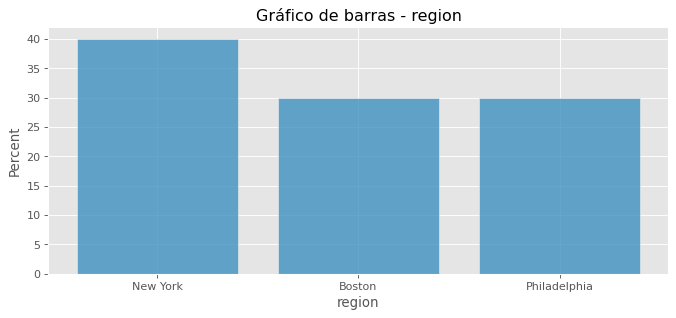

In [5]:
plt.figure(figsize=(10, 4), dpi=80)
sns.histplot(data=df_sales, x="region", shrink=.8, stat='percent')
plt.title("Gráfico de barras - region")
plt.show()

In [6]:
df_sales['region'].value_counts(normalize=True)

New York       0.40
Boston         0.30
Philadelphia   0.30
Name: region, dtype: float64

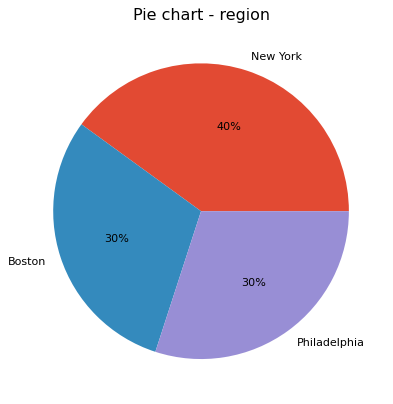

In [7]:
plt.figure(figsize=(6, 6), dpi=80, facecolor='white')
plt.pie(df_sales['region'].value_counts(normalize=True)*100, labels = df_sales['region'].value_counts(normalize=True).index, autopct='%.0f%%')
plt.title("Pie chart - region")
plt.show()

In [9]:
df_sales.describe()

d_1       d_2       d_3       d_4       d_5       d_6       d_7  \
count 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00   
mean       1.07      1.04      0.78      0.83      0.63      0.96      0.92   
std        5.13      5.37      3.67      4.42      3.38      4.79      5.06   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
50%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
75%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
max      360.00    436.00    207.00    323.00    296.00    314.00    316.00   

            d_8       d_9      d_10      d_11      d_12      d_13      d_14  \
count 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00   
mean       1.24      1.07      0.84      0.76      0.78      0.78      0.87   
std        6.62      5.92      4.21      3.67      3.70      3.49      3.48   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
50%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
75%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
max      370.00    385.00    353.00    279.00    258.00    163.00    107.00   

           d_15      d_16      d_17      d_18      d_19      d_20      d_21  \
count 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00   
mean       1.14      1.19      0.72      0.79      0.70      0.67      0.78   
std        4.64      4.66      2.99      3.30      2.81      2.61      2.99   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
50%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
75%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
max      133.00    149.00    122.00    111.00     83.00     95.00    100.00   

           d_22      d_23      d_24      d_25      d_26      d_27      d_28  \
count 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00   
mean       1.04      0.96      0.79      0.67      0.68      0.67      0.74   
std        3.92      3.60      3.08      2.87      2.73      2.64      2.84   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
50%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
75%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
max      132.00    120.00    113.00    158.00    105.00    104.00     94.00   

           d_29      d_30      d_31      d_32      d_33      d_34      d_35  \
count 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00   
mean       0.98      0.94      0.70      0.75      0.72      0.77      0.77   
std        3.71      3.69      2.71      2.92      2.89      3.09      3.14   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
50%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
75%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
max      125.00    138.00     88.00    104.00     91.00     90.00     98.00   

           d_36      d_37      d_38      d_39      d_40      d_41      d_42  \
count 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00   
mean       1.02      1.14      0.81      0.75      0.74      0.74      0.84   
std        3.94      4.62      3.08      3.01      3.02      2.94      3.22   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%        0.00      0.00      0.00      0.00      0.00  

In [11]:
colunas = df_sales.columns
colunas

Index(['id', 'item', 'category', 'department', 'store', 'store_code', 'region',
       'd_1', 'd_2', 'd_3',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1920)

In [9]:
# list_columns = ""
lista_valores = []

for i in range(1, 1914):
    # Adiciona o valor "d_" seguido do número à lista
    lista_valores.append("d_" + str(i))

df_sales[lista_valores].astype("int16")

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,0,2,2,0,3,1,4,1,0,...,2,0,0,0,0,0,1,0,0,1
30486,0,0,0,0,0,5,0,1,1,3,...,0,0,0,0,0,0,0,0,1,0
30487,0,6,0,2,2,4,1,8,5,2,...,2,1,0,2,0,1,0,0,1,0
30488,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [12]:
vendas = df_sales.iloc[:, 7:]
vendas

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,0,2,2,0,3,1,4,1,0,...,2,0,0,0,0,0,1,0,0,1
30486,0,0,0,0,0,5,0,1,1,3,...,0,0,0,0,0,0,0,0,1,0
30487,0,6,0,2,2,4,1,8,5,2,...,2,1,0,2,0,1,0,0,1,0
30488,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [13]:
soma_vendas = vendas.sum(axis=1)

In [15]:
df_sales["Total de Vendas"] = soma_vendas

In [23]:
df1 = df_sales[["id", df_sales.columns[-1]]]
df1 = df1.sort_values(by=df1.columns[-1], ascending=False)
df1.head(20)

,id,Total de Vendas
8412,SUPERMARKET_3_090_NYC_3,250502
18055,SUPERMARKET_3_586_BOS_2,192835
21104,SUPERMARKET_3_586_BOS_3,150122
8908,SUPERMARKET_3_586_NYC_3,134386
2314,SUPERMARKET_3_090_NYC_1,127203
29755,SUPERMARKET_3_090_PHI_3,121434
17559,SUPERMARKET_3_090_BOS_2,119496
20608,SUPERMARKET_3_090_BOS_3,114854
17721,SUPERMARKET_3_252_BOS_2,114153
15006,SUPERMARKET_3_586_BOS_1,112454


In [24]:
df1 = df_sales[["store", df_sales.columns[-1]]]
df1 = df1.sort_values(by=df1.columns[-1], ascending=False)
df1.head(20)

,store,Total de Vendas
8412,Tribeca,250502
18055,Roxbury,192835
21104,Back_Bay,150122
8908,Tribeca,134386
2314,Greenwich_Village,127203
29755,Queen_Village,121434
17559,Roxbury,119496
20608,Back_Bay,114854
17721,Roxbury,114153
15006,South_End,112454


In [26]:
df1 = df_sales[["region", df_sales.columns[-1]]]
df1 = df1.sort_values(by=df1.columns[-1], ascending=False)
df1.head(20)

,region,Total de Vendas
8412,New York,250502
18055,Boston,192835
21104,Boston,150122
8908,New York,134386
2314,New York,127203
29755,Philadelphia,121434
17559,Boston,119496
20608,Boston,114854
17721,Boston,114153
15006,Boston,112454


# Merge Entre DF Sales e DF Event

In [ ]:
sales_melted = df_sales.melt(id_vars=['id', 'item'], var_name='d', value_name='value_sales')

# Juntar os datasets com base na coluna 'd'
merged_df = pd.merge(sales_melted, df_event[['d', 'date', 'yearweek', 'year']], on='d')

merged_df.head()

,id,item,d,value_sales,date,yearweek,year
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,d_1,0,2011-01-29,20114,2011
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,d_1,0,2011-01-29,20114,2011
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,d_1,0,2011-01-29,20114,2011
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,d_1,0,2011-01-29,20114,2011
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,d_1,0,2011-01-29,20114,2011


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58327370 entries, 0 to 58327369
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           object        
 1   item         object        
 2   d            object        
 3   value_sales  object        
 4   date         datetime64[ns]
 5   yearweek     int16         
 6   year         int64         
dtypes: datetime64[ns](1), int16(1), int64(1), object(4)
memory usage: 3.2+ GB


In [ ]:
colunas = merged_df.columns

In [ ]:
# Agrupar os valores por região e data, fazendo a soma da coluna 'value' e mostrando todas as colunas
sales_agg = merged_df.groupby(['id', 'item']).agg({
    'value_sales': 'sum',
    #'item':'first',
    #'category':'first',
    #'department':'first',
    #'store':'first',
    #'store_code':'first',
    #'region':'first',
    'd':'first',
    'yearweek':'first',
    'year':'first'
}).reset_index()  # Resetando o índice para criar um novo DataFrame

sales_agg.head()

,id,item,value_sales,d,yearweek,year
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,260,d_1,20114,2011
1,ACCESORIES_1_001_BOS_2,ACCESORIES_1_001,402,d_1,20114,2011
2,ACCESORIES_1_001_BOS_3,ACCESORIES_1_001,385,d_1,20114,2011
3,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,600,d_1,20114,2011
4,ACCESORIES_1_001_NYC_2,ACCESORIES_1_001,542,d_1,20114,2011


In [ ]:
colunas = sales_agg.columns

In [ ]:
# Cria um novo dataframe com os dados agrupados e valore somados
colunas = list(sales_agg.drop('value_sales', axis=1).columns)
sales_goup = sales_agg.groupby(colunas)['value_sales'].sum().reset_index()

In [ ]:
sales_goup.head()

,id,item,d,yearweek,year,value_sales
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,d_1,20114,2011,260
1,ACCESORIES_1_001_BOS_2,ACCESORIES_1_001,d_1,20114,2011,402
2,ACCESORIES_1_001_BOS_3,ACCESORIES_1_001,d_1,20114,2011,385
3,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,d_1,20114,2011,600
4,ACCESORIES_1_001_NYC_2,ACCESORIES_1_001,d_1,20114,2011,542


# Merge entre DF Agrupado e DF Prices

In [ ]:
# concatena o novo dataframe agrupado com o dataframe prices para ter o valor da semana
merged_sales_group_prices = pd.merge(sales_goup, df_prices, on=['item', 'yearweek'], how='outer')

In [ ]:
merged_sales_group_prices.head()

,id,item,d,yearweek,year,value_sales,category,store_code,sell_price
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,d_1,20114.0,2011.0,260,NaN,NaN,NaN
1,ACCESORIES_1_001_BOS_2,ACCESORIES_1_001,d_1,20114.0,2011.0,402,NaN,NaN,NaN
2,ACCESORIES_1_001_BOS_3,ACCESORIES_1_001,d_1,20114.0,2011.0,385,NaN,NaN,NaN
3,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,d_1,20114.0,2011.0,600,NaN,NaN,NaN
4,ACCESORIES_1_001_NYC_2,ACCESORIES_1_001,d_1,20114.0,2011.0,542,NaN,NaN,NaN


In [1]:
merged_sales_group_prices.info()

NameError: name 'merged_sales_group_prices' is not defined

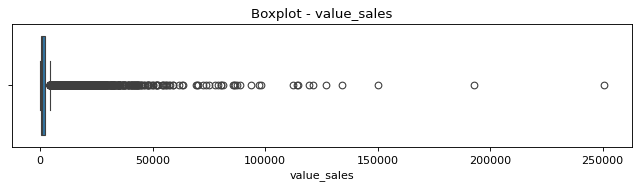

In [ ]:
plt.figure(figsize=(10, 2), dpi=80)
sns.boxplot(x=sales_agg["value_sales"])
plt.title("Boxplot - value_sales")
plt.show()